In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_ebay_deals.csv')

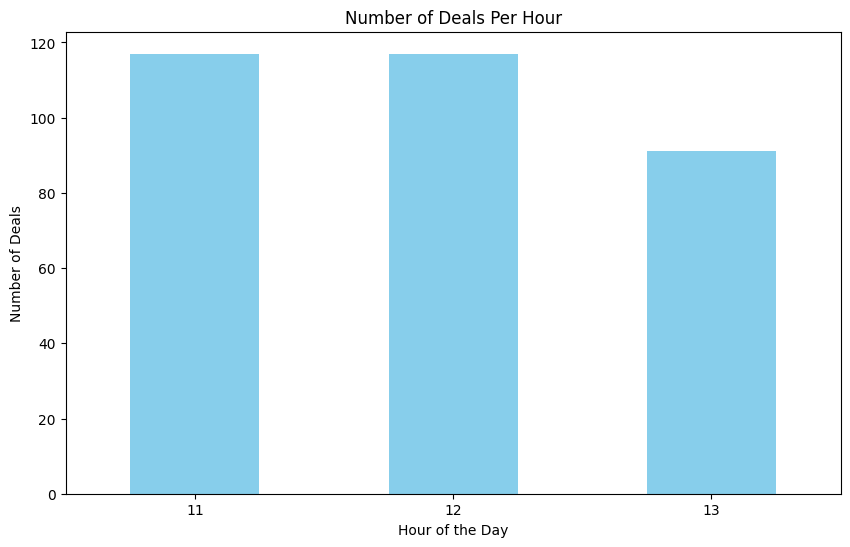

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')

df['hour'] = df['timestamp'].dt.hour

hourly_deals = df.groupby('hour').size()

plt.figure(figsize=(10, 6))
hourly_deals.plot(kind='bar', color='skyblue')
plt.title('Number of Deals Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.show()

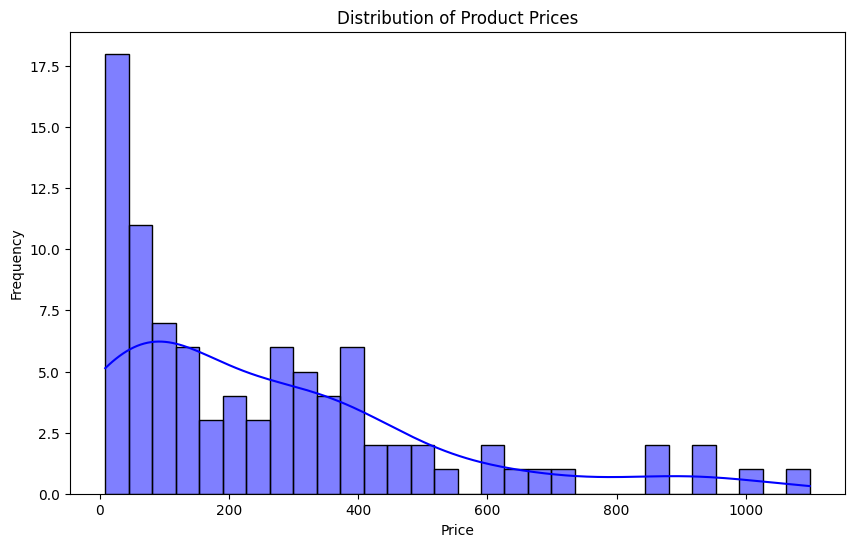

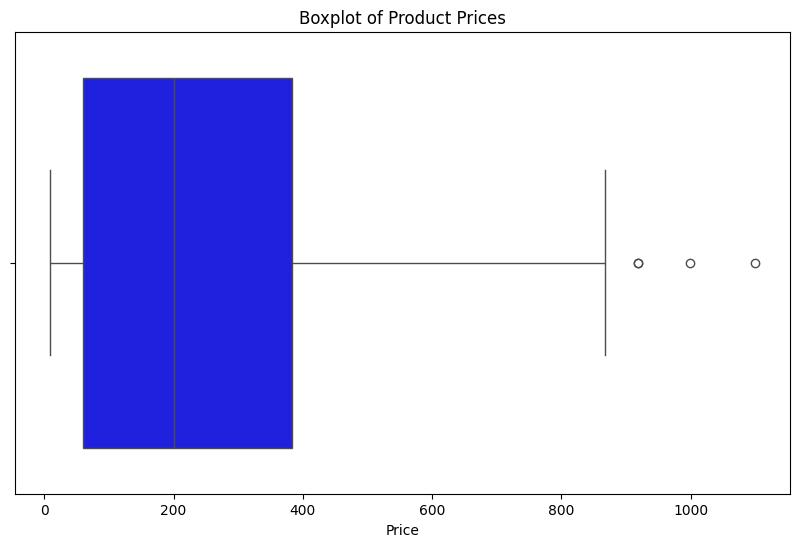

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='blue')
plt.title('Boxplot of Product Prices')
plt.xlabel('Price')
plt.show()

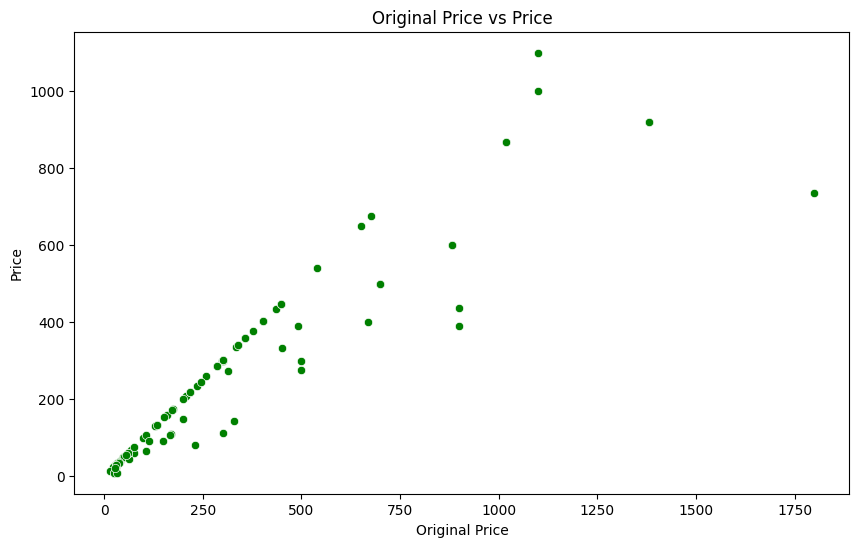

In [5]:
# Scatter plot comparing original_price vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['original_price'], y=df['price'], color='green')
plt.title('Original Price vs Price')
plt.xlabel('Original Price')
plt.ylabel('Price')
plt.show()


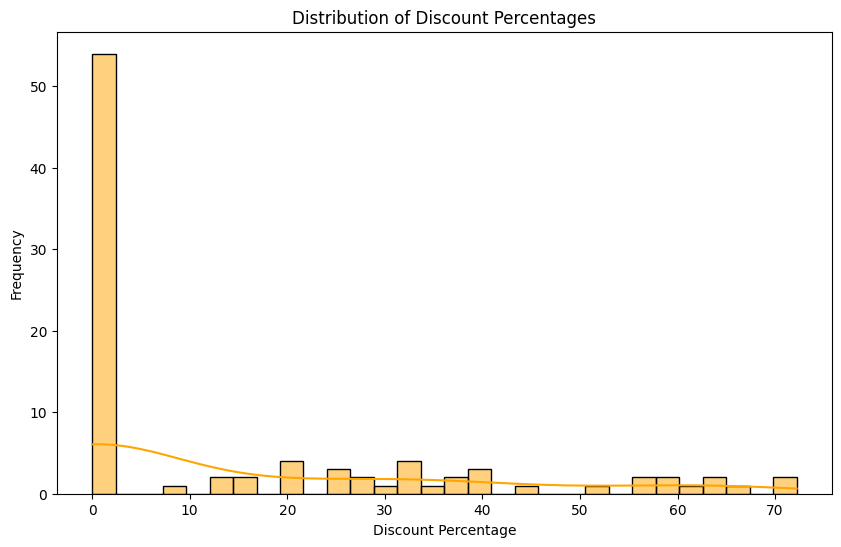

In [6]:
# Plot the distribution of the discount_percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], kde=True, color='orange', bins=30)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()


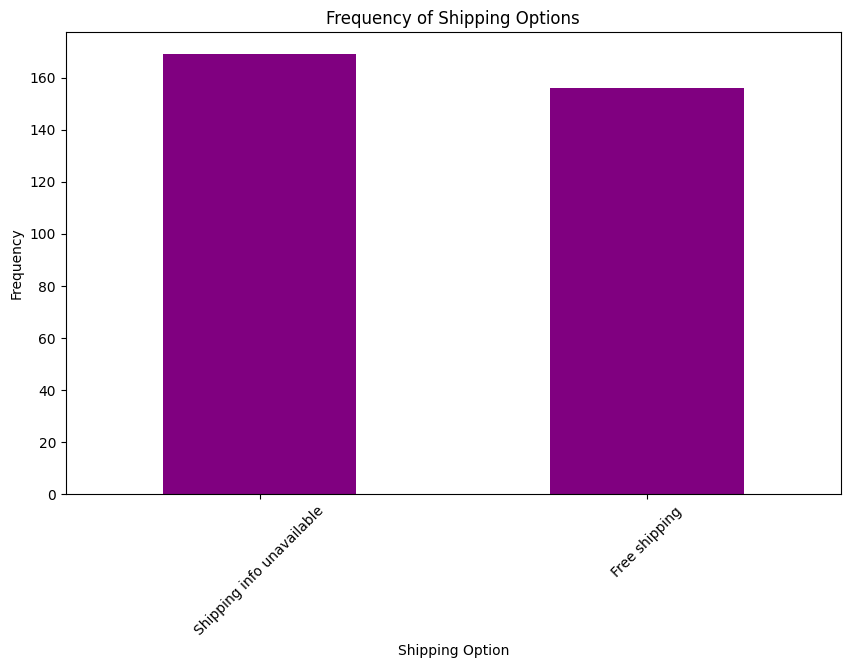

In [7]:
# Count the frequency of different shipping options
shipping_freq = df['shipping'].value_counts()

# Plot a bar chart showing the frequency of shipping options
plt.figure(figsize=(10, 6))
shipping_freq.plot(kind='bar', color='purple')
plt.title('Frequency of Shipping Options')
plt.xlabel('Shipping Option')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


<ipython-input-8-468a7ebf2f25>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword', y='Frequency', data=keyword_df, palette='Set2')


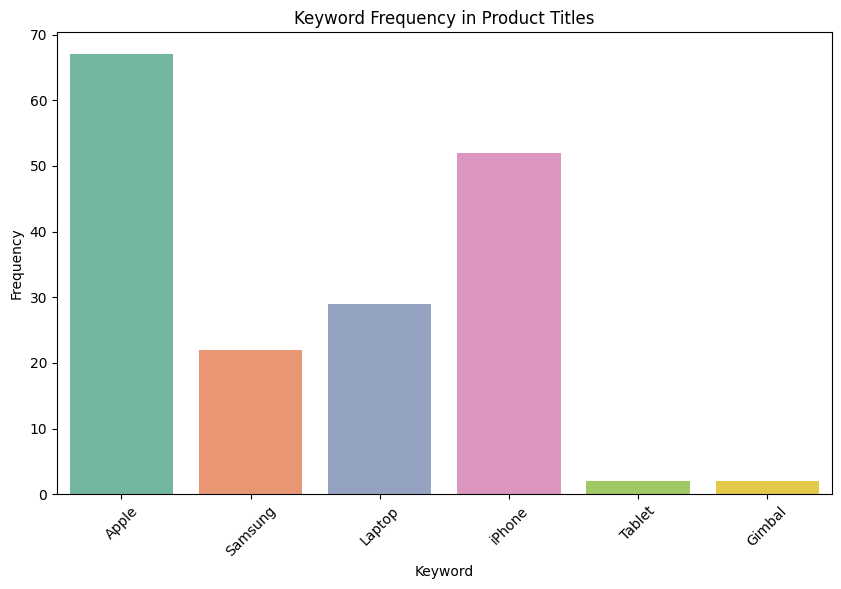

In [8]:
# Define a set of keywords to count
keywords = ['Apple', 'Samsung', 'Laptop', 'iPhone', 'Tablet', 'Gimbal']

# Count how many times each keyword appears in the title column
keyword_counts = {keyword: df['title'].str.contains(keyword, case=False, na=False).sum() for keyword in keywords}

# Convert to a DataFrame for easy visualization
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Frequency'])

# Plot the keyword frequencies using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword', y='Frequency', data=keyword_df, palette='Set2')
plt.title('Keyword Frequency in Product Titles')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


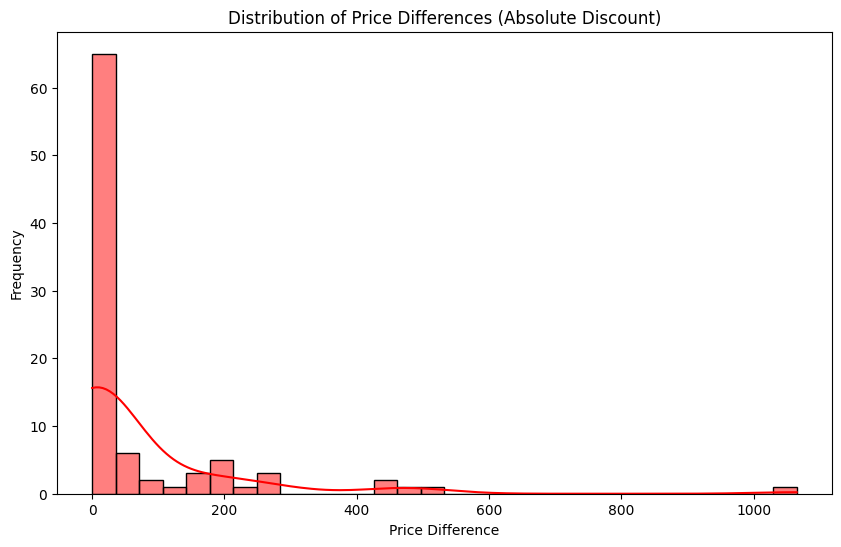

In [9]:
# Compute a new column for the absolute discount
df['absolute_discount'] = df['original_price'] - df['price']

# Plot a histogram of the price differences (absolute discount)
plt.figure(figsize=(10, 6))
sns.histplot(df['absolute_discount'], kde=True, color='red', bins=30)
plt.title('Distribution of Price Differences (Absolute Discount)')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Sort the dataset by discount_percentage in descending order
top_discounts = df.sort_values(by='discount_percentage', ascending=False).head(5)

# Display the top 5 deals with the highest discounts
top_discounts[['title', 'price', 'original_price', 'discount_percentage']]


,title,price,original_price,discount_percentage
71,Max/Max 2 - White House Hero DVD - BRAND-NEW a...,8.88,31.95,72.21
75,Double Feature DVD: The Losers & RocknRolla wi...,8.88,29.95,70.35
59,Soundcore Space Q45 Wireless Headphone Over-Ea...,79.99,229.99,65.22
73,Otto the Rhino DVD 2012 Animated English Versi...,8.88,24.95,64.41
72,"Poms (DVD, 2019, Widescreen) Diane Keaton, Jac...",8.88,24.95,64.41
